## Chapter 8 - Exercise 2: Breast cancer

#### Sử dụng tập dữ liệu ung thư, một vấn đề phân loại nhiều lớp rất nổi tiếng. Số liệu này được tính toán từ một hình ảnh số hóa của FNA về ung thư vú. Chúng mô tả các đặc điểm của nhân tế bào có trong hình ảnh.
#### Dữ liệu này có hai loại ung thư: ác tính (có hại) và lành tính (không có hại). Ta có thể xây dựng một mô hình để phân loại loại ung thư.

- Cho dữ liệu breast_cancer nằm trong sklearn.datasets
#### Yêu cầu: đọc dữ liệu về, chuẩn hóa dữ liệu (nếu cần) và áp dụng thuật toán SVM để thực hiện việc dự đoán có bị ung thư hay không dựa trên thông tin được cung cấp
1. Tạo X_train, X_test, y_train, y_test từ dữ liệu đọc được với tỷ lệ dữ liệu test là 0.3
2. Áp dụng thuật toán SVM
3. Tìm kết quả
4. Kiểm tra độ chính xác
5. So sánh hiệu suất của các thuật toán classification: RandomForestClassifier, SVC,
GaussianNB, LogisticRegression
6. Trực quan hóa kết quả. Trong các thuật toán trên, thuật toán nào phù hợp nhất với yêu cầu
phân loại trên?

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns

%load_ext nb_black

<IPython.core.display.Javascript object>

### Tập Features

In [5]:
cancer = datasets.load_breast_cancer()
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

<IPython.core.display.Javascript object>

### Tập target

In [6]:
print("Labels: ", cancer.target_names)

Labels:  ['malignant' 'benign']


<IPython.core.display.Javascript object>

In [7]:
cancer.data.shape

(569, 30)

<IPython.core.display.Javascript object>

In [9]:
'''
569 dòng, 30 cột
'''



'\n569 dòng, 30 cột\n'

<IPython.core.display.Javascript object>

In [10]:
print(cancer.target[[0, 1, 2]])
print(list(cancer.target_names))

[0 0 0]
['malignant', 'benign']


<IPython.core.display.Javascript object>

In [11]:
# print the cancer data features (top 5 records)
print(cancer.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

<IPython.core.display.Javascript object>

In [14]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

<IPython.core.display.Javascript object>

In [17]:
print(cancer.data[:, :5])
print(cancer.target[:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01]
 ...
 [1.660e+01 2.808e+01 1.083e+02 8.581e+02 8.455e-02]
 [2.060e+01 2.933e+01 1.401e+02 1.265e+03 1.178e-01]
 [7.760e+00 2.454e+01 4.792e+01 1.810e+02 5.263e-02]]
[0 0 0 0 0]


<IPython.core.display.Javascript object>

In [19]:
# print the cancer labels (0:malignant, 1:benign) =>
# malignant (ác tính), benign (lành tính)
print("malignant:", cancer.target[cancer.target == 0].size)
print("benign:", cancer.target[cancer.target == 1].size)

malignant: 212
benign: 357


<IPython.core.display.Javascript object>

### Chia tập train - test

In [23]:
X = cancer.data
y = cancer.target

<IPython.core.display.Javascript object>

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

<IPython.core.display.Javascript object>

### sử dụng SVM - SVC

In [31]:
clf = svm.SVC(kernel="linear").fit(X_train, y_train)
clf

SVC(kernel='linear')

<IPython.core.display.Javascript object>

In [32]:
# Kiểm tra độ chính xác
print("R-squared in train dataset: ", clf.score(X_train, y_train))
print("R-squared in test dataset: ", clf.score(X_test, y_test))

R-squared in train dataset:  0.964824120603015
R-squared in test dataset:  0.9649122807017544


<IPython.core.display.Javascript object>

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
def evalute(model, X_train, X_test, y_train, y_test):
    yhat_test = model.predict(X_test)
    yhat_train = model.predict(X_train)
    
    print("***TRAINIG RESULTS***: \n==================================================")
    clf_report = pd.DataFrame(classification_report(y_train, yhat_train, output_dict=True))
    print('Confusion matrix: \n', confusion_matrix(y_train, yhat_train))
    print("Train Accuracy Score:", accuracy_score(y_train, yhat_train))
    print('Classification Report: \n', classification_report(y_train, yhat_train))
    
    print("\n***TEST RESULTS***: \n===================================================")
    print("Test Accuracy:", accuracy_score(y_test, yhat_test))
    clf_report = pd.DataFrame(classification_report(y_test, yhat_test, output_dict=True))
    print('Confusion matrix: \n', confusion_matrix(y_test, yhat_test))
    print("Test Accuracy Score:", accuracy_score(y_test, yhat_test))
    print('Classification Report: \n', classification_report(y_test, yhat_test))


<IPython.core.display.Javascript object>

In [38]:
evalute(clf, X_train, X_test, y_train, y_test)

***TRAINIG RESULTS***: 
Confusion matrix: 
 [[138  11]
 [  3 246]]
Train Accuracy Score: 0.964824120603015
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.93      0.95       149
           1       0.96      0.99      0.97       249

    accuracy                           0.96       398
   macro avg       0.97      0.96      0.96       398
weighted avg       0.97      0.96      0.96       398


***TEST RESULTS***: 
Test Accuracy: 0.9649122807017544
Confusion matrix: 
 [[ 59   4]
 [  2 106]]
Test Accuracy Score: 0.9649122807017544
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



<IPython.core.display.Javascript object>

In [40]:
"""
R-square của cả train và test đều cao
Accuracy, recall,  precision, f1-score của cả train và test đều cao

=> model tốt
"""

"""
High accuracy: ~0.95
High precision: ~0.95, High recall: ~0.98
High training R^2 score and High testing score, nearly the same
=> The good model
"""

'\nHigh accuracy: ~0.95\nHigh precision: ~0.95, High recall: ~0.98\nHigh training R^2 score and High testing score, nearly the same\n=> The good model\n'

<IPython.core.display.Javascript object>

## Lựa chọn model phù hợp
- Ta chọn ra model phù hợp nhất đối với data set này

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

<IPython.core.display.Javascript object>

In [46]:
# Tính độ chính xác theo: Logistic, Naive Bayes, SVM, KNN
from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200),
    SVC(kernel="linear"),
    GaussianNB(),
    LogisticRegression(solver="liblinear"),  # solver='lbfgs',
]

CV = 5  # số lần lặp
cv_df = pd.DataFrame(index=range(CV * len(models)))  # lưu kết quả acc của 4 model
entries = []  # lưu 2 thông tin là model_name và accuracies.mean()
for model in models:  # duyệt từng model trong ds model
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, y, scoring="accuracy", cv=CV)
    print(accuracies)
    entries.append([model_name, accuracies.mean()])


[0.92105263 0.95614035 0.99122807 0.97368421 0.98230088]
[0.94736842 0.92982456 0.97368421 0.92105263 0.95575221]
[0.92105263 0.92105263 0.94736842 0.94736842 0.95575221]
[0.92982456 0.93859649 0.97368421 0.94736842 0.96460177]


<IPython.core.display.Javascript object>

In [48]:
cv_df = pd.DataFrame(entries, columns=["model_name", "accuracy"]).sort_values(
    by="accuracy", ascending=False
)
cv_df

,model_name,accuracy
0,RandomForestClassifier,0.964881
3,LogisticRegression,0.950815
1,SVC,0.945536
2,GaussianNB,0.938519


<IPython.core.display.Javascript object>

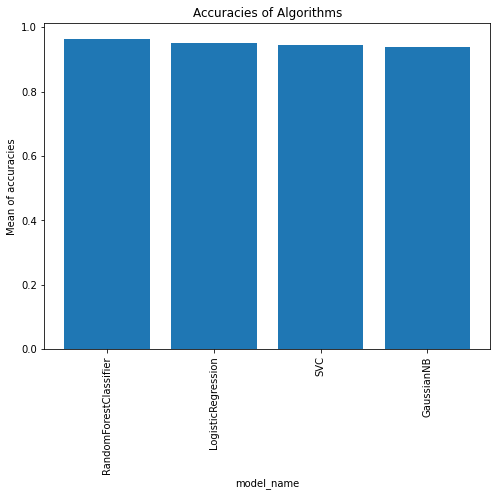

<IPython.core.display.Javascript object>

In [49]:
plt.figure(figsize=(8, 6))

plt.bar(cv_df["model_name"], cv_df["accuracy"])
plt.xlabel("model_name")
plt.ylabel("Mean of accuracies")
plt.xticks(rotation="vertical")
plt.title("Accuracies of Algorithms")
plt.show()

In [50]:
"""
=> model có điểm cao nhất là RandomForestClassifier
nhưng ở đây ta sẽ chọn logistic regression model vì model này đơn giản mà vẫn đem lại high score (xếp thứ 2)
"""

'\n=> model có điểm cao nhất là RandomForestClassifier\nnhưng ở đây ta sẽ chọn logistic regression model vì model này đơn giản mà vẫn đem lại high score (xếp thứ 2)\n'

<IPython.core.display.Javascript object>